# Part 4.3: Results

In this part we apply the training results and produce the prediction plots and also comparison plots to ECMWF model. The results are discussed in Part 5.


## Read-in and check all is good

In [1]:
lead_day=1

# Read-in the water level dataset and check the content
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
import os
import warnings
INF_str = "/Users/oncel/Documents/Projects/KoelnPegelML/training_datasets/"
warnings.filterwarnings('ignore')


In [2]:
rfc_file = "/Users/oncel/Documents/Projects/KoelnPegelML/data/reforecasted_"+str(lead_day)+"d.grib"

results = pd.read_csv("results_datasets/results_"+str(lead_day)+"d.csv", index_col=0, parse_dates=True)

save_dir = "/Users/oncel/Documents/Projects/KoelnPegelML/finalplots_"+str(lead_day)+"day"
os.makedirs(save_dir, exist_ok=True)

In [3]:
results

,Actual,Predicted,std,10,20,40,60,80,90
2017-12-31,440.697917,550.22705,173.01689,417.13284,523.93475,534.84150,521.73350,523.68590,533.81660
2018-01-01,521.364583,573.43854,173.01689,431.92017,560.55340,589.24310,601.04614,589.80930,584.68030
2018-01-02,589.864583,636.98047,173.01689,431.63208,593.96560,637.83405,638.16520,640.24970,645.73050
2018-01-03,646.822917,693.98080,173.01689,431.92017,597.44806,691.24335,702.29260,709.75730,704.54010
2018-01-04,694.406250,753.73330,173.01689,434.46630,610.35760,725.08014,747.61920,766.27630,759.99194
...,...,...,...,...,...,...,...,...,...
2018-12-26,517.041667,536.69165,173.01689,434.05933,519.15270,525.83685,541.52480,535.69590,553.22520
2018-12-27,526.739583,499.99520,173.01689,423.94614,498.85474,501.11084,504.64096,490.13608,525.35284
2018-12-28,492.197917,439.28270,173.01689,410.37070,426.21814,437.40640,433.02936,457.26553,450.54590
2018-12-29,427.062500,384.91208,173.01689,365.94780,374.55545,381.73410,385.66500,389.02808,389.48500


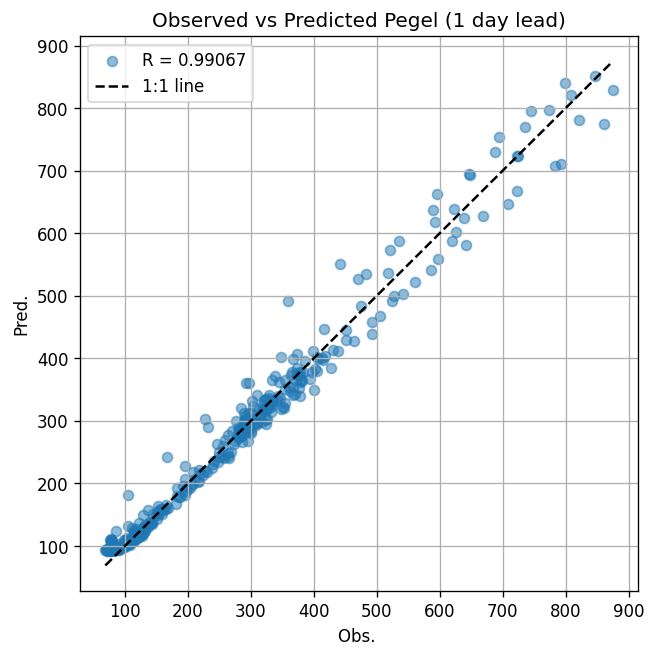

In [4]:
from scipy.stats import pearsonr
# Calculate correlation
corr, _ = pearsonr(results["Actual"], results["Predicted"])

plt.figure(figsize=(6,6), dpi=120)
plt.scatter(results["Actual"], results["Predicted"], alpha=0.5, label=f"R = {corr:.5f}")
plt.plot([results["Actual"].min(), results["Actual"].max()],
         [results["Actual"].min(), results["Actual"].max()],
         color="black", linestyle="--", label="1:1 line")

plt.xlabel("Obs. ")
plt.ylabel("Pred.")
plt.title("Observed vs Predicted Pegel ("+str(lead_day)+" day lead)")
plt.legend()
plt.grid(True)
save_path = os.path.join(save_dir, "obs_pred_corr.png")
# Save plot
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

## Prediction results

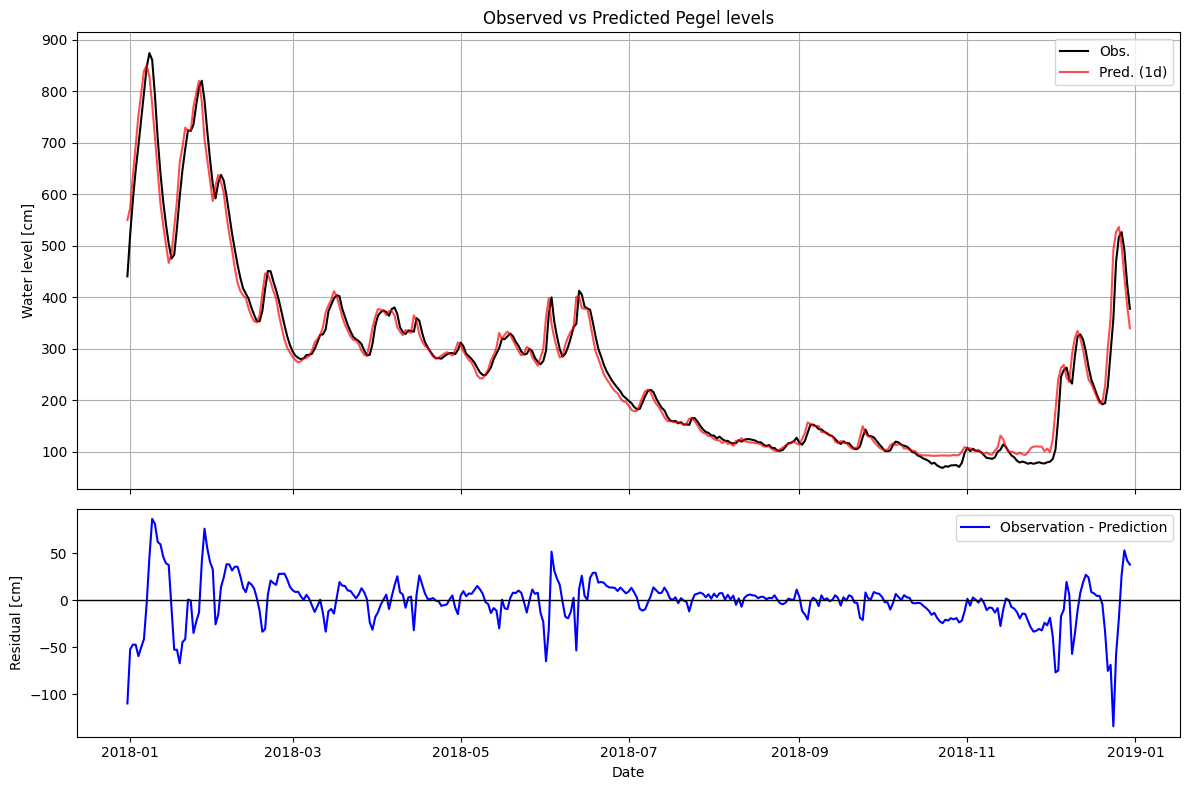

In [5]:
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(12,8), sharex=True, gridspec_kw={"height_ratios":[2,1]}
)

# Plot obs,. vs pred.
ax1.plot(results.index, results["Actual"], label="Obs.", color="black")
ax1.plot(results.index, results["Predicted"], label="Pred. ("+str(lead_day)+"d)", color="red", alpha=0.7)
ax1.set_ylabel("Water level [cm]")
ax1.set_title("Observed vs Predicted Pegel levels")
ax1.legend()
ax1.grid(True)

# Plot res.
residuals = results["Actual"] - results["Predicted"]
ax2.plot(results.index, residuals, label="Observation - Prediction", color="blue")
ax2.axhline(0, color="black", lw=1, linestyle="-")
ax2.set_ylabel("Residual [cm]")
ax2.set_xlabel("Date")
ax2.set_xlabel("Residual [cm]")
ax2.set_xlabel("Date")
ax2.legend()
ax2.grid(False)

plt.tight_layout()
plt.show()

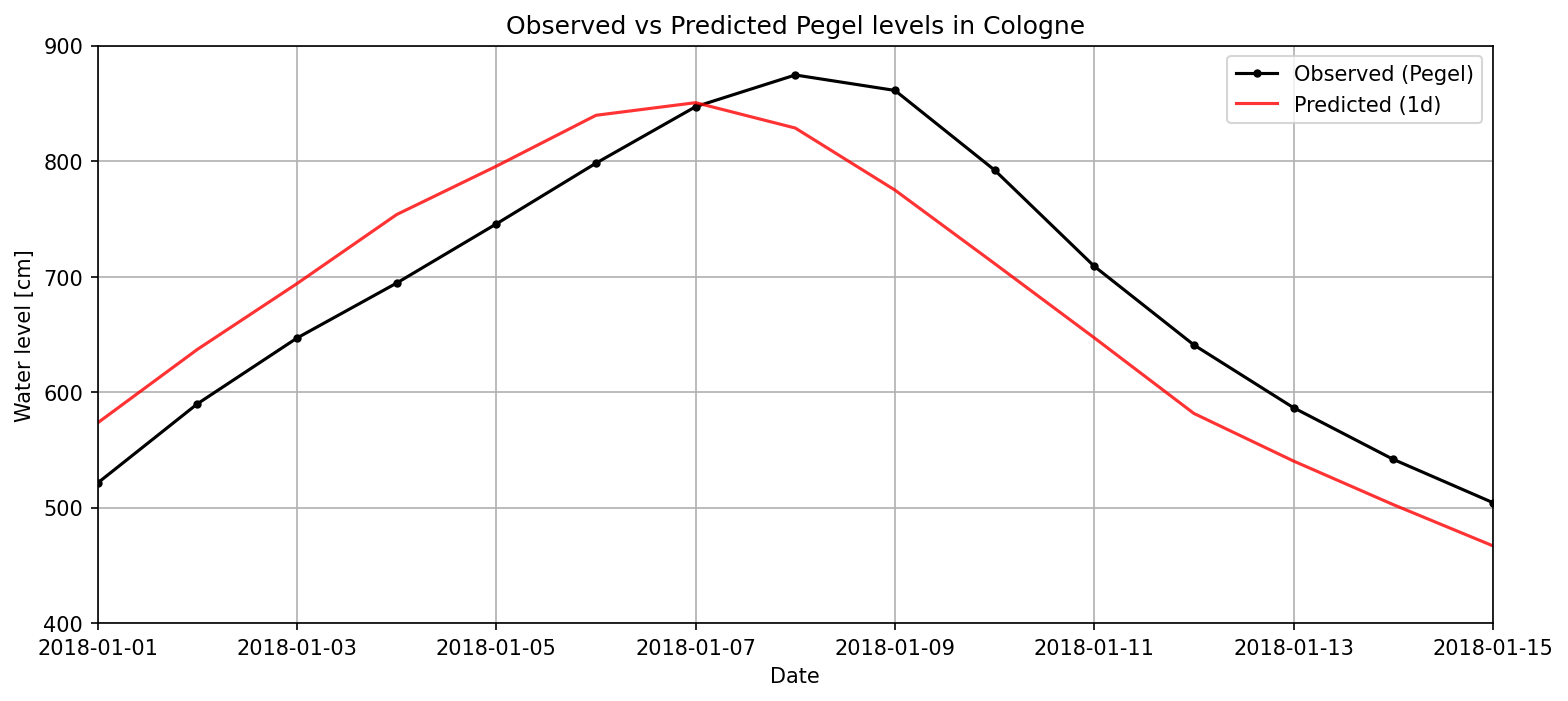

In [6]:
plt.figure(figsize=(12,5), dpi=150)
plt.plot(results.index, results["Actual"], label="Observed (Pegel)", color="black", marker='.')
plt.plot(results.index, results["Predicted"], label="Predicted ("+str(lead_day)+"d)", color="red", alpha=0.8)

plt.xlabel("Date")
plt.ylabel("Water level [cm]")
plt.title("Observed vs Predicted Pegel levels in Cologne")
# Set custom x-axis range
plt.xlim(pd.Timestamp("2018-01-01"), pd.Timestamp("2018-01-15"))
plt.ylim(400, 900)
plt.legend()
plt.grid(True)
plt.show()

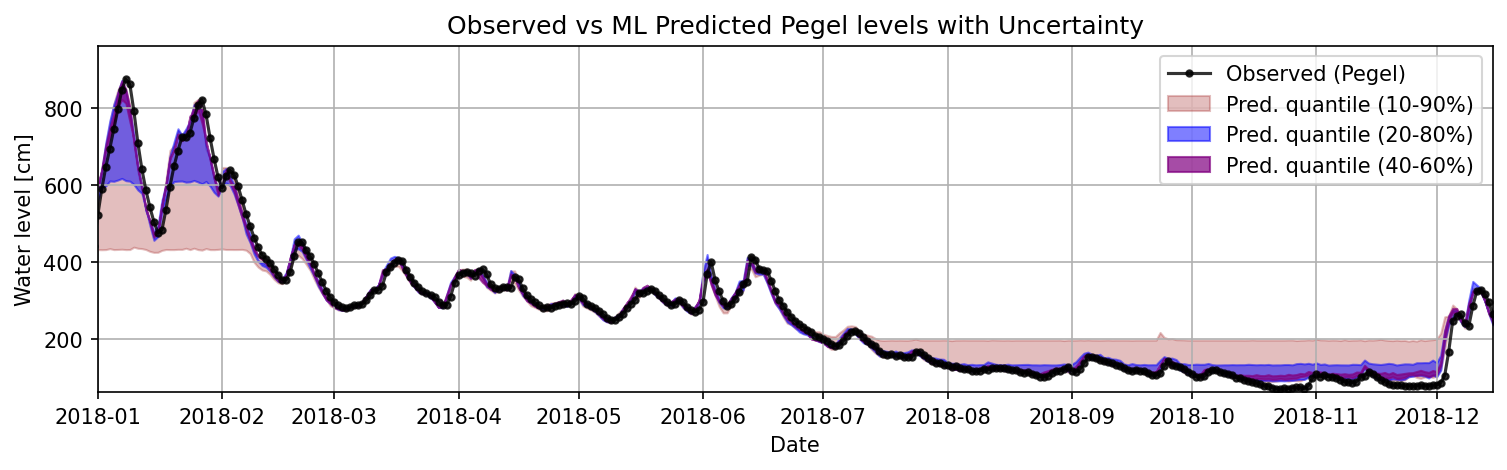

In [7]:
# Plotting
fig, ax = plt.subplots(figsize=(12,3), dpi=150)

# Observed
ax.plot(results.index, results["Actual"], color="black", marker=".", label="Observed (Pegel)", alpha=0.8)

# Predicted mean
#ax.plot(pred_50.index, pred_50_h, color="red", lw=2, alpha=0.5, label="Pred. (mean)")

ax.fill_between(results.index, results["10"], results["90"], color="brown", alpha=0.3, label="Pred. quantile (10-90%)")
ax.fill_between(results.index, results["20"], results["80"], color="blue", alpha=0.5, label="Pred. quantile (20-80%)")
ax.fill_between(results.index, results["40"], results["60"], color="purple", alpha=0.7, label="Pred. quantile (40-60%)")
x0, x1 = pd.Timestamp("2018-1-01"), pd.Timestamp("2018-12-15")
ax.set_xlim(x0, x1)
mask = (results.index >= x0) & (results.index <= x1)
r_masked=results[mask]
ymin = r_masked["Actual"].min() - 0.1*r_masked["Actual"].min()
ymax = r_masked["Actual"].max() + 0.1*r_masked["Actual"].max()

ax.set_ylim(ymin, ymax)
ax.set_xlabel("Date")
ax.set_ylabel("Water level [cm]")
ax.set_title("Observed vs ML Predicted Pegel levels with Uncertainty")
ax.legend()
ax.grid(True)
save_path = os.path.join(save_dir, "obs_pred_fullrange.png")
# Save plot
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

# ECMWF Comparison

In [8]:
## Koelner Pegel Rating Equation
# Function to calculate water height from discharge
def h_from_Q(Q):
    """
    Compute water stage (h) from discharge (Q) 
    using rating curve: Q = 344.32 * (h)^1.42
    """
    a = 522
    b = 1.19
    h0 = 0.00  # threshold

    return ((Q / a) ** (1 / b)) + h0


def Q_from_h(h):
    """
    Compute water stage (h) from discharge (Q) 
    using rating curve: Q = 344.32 * (h)^1.42
    """
    a = 522
    b = 1.19
    h0 = 0.00  # threshold

    return a*((h - h0)**(b))

In [9]:
# Read-in the dataset separate the two data formats
import xarray as xr

ds_cf = xr.open_dataset(
    rfc_file,
    engine="cfgrib",
    filter_by_keys={"dataType": "cf"}
)

ds_pf = xr.open_dataset(
    rfc_file,
    engine="cfgrib",
    filter_by_keys={"dataType": "pf"}
)

ds_cf = ds_cf.expand_dims(number=[0])

# Add dataType coordinate
ds_cf = ds_cf.assign_coords(dataType="cf")
ds_pf = ds_pf.assign_coords(dataType="pf")

# Concatenate along dataType
ds = xr.concat([ds_cf, ds_pf], dim="dataType")

In [10]:
# Find the closest grid point in the dataset to the reference coordinate
import numpy as np
import matplotlib.pyplot as plt

# Coordinates of Kölner Pegel
cologne_lat, cologne_lon = 50.9369, 6.9632

# Find nearest grid cell
abs_lat = np.abs(ds.latitude - cologne_lat)
abs_lon = np.abs(ds.longitude - cologne_lon)
dist = abs_lat + abs_lon
iy, ix = np.unravel_index(dist.argmin(), dist.shape)

lat_nearest = float(ds.latitude[iy])
lon_nearest = float(ds.longitude[ix])
print("Nearest grid point:", lat_nearest, lon_nearest)

ens_point = ds_pf.isel(latitude=iy, longitude=ix)
ctrl_point = ds_cf.isel(latitude=iy, longitude=ix)

Nearest grid point: 50.941666000000005 6.958332999999999


In [11]:
# Create the control and ensemble sets
ens_point  = ens_point.sel(time=slice("2018-01-01", "2018-12-27"))
ctrl_point = ctrl_point.sel(time=slice("2018-01-01", "2018-12-27"))



## Discharge

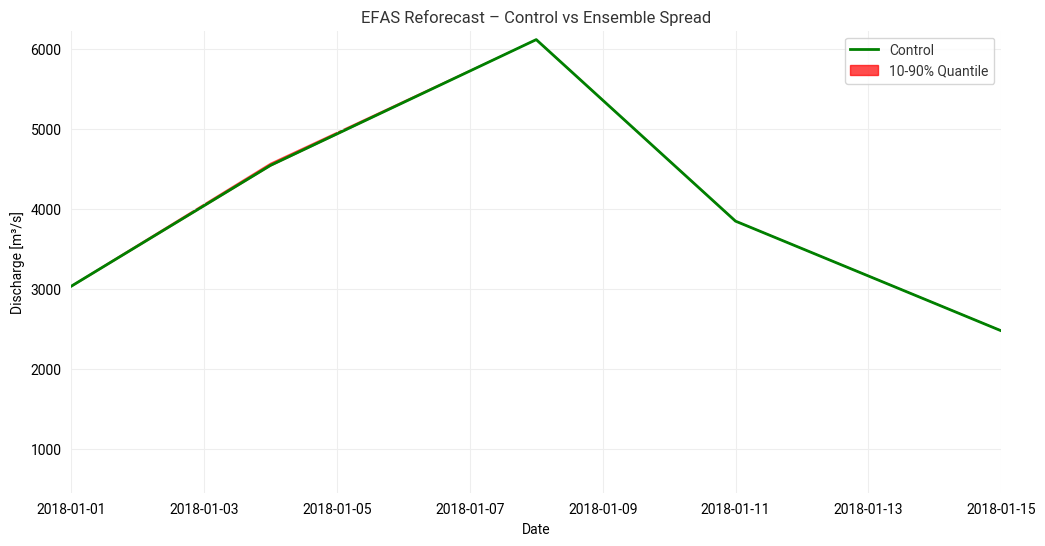

In [12]:
# Pick the discharge variable
var = "dis06"

# Nearest location
ctrl = ds.sel(dataType="cf")[var].isel(number=0, latitude=iy, longitude=ix)
ens  = ds.sel(dataType="pf")[var].isel(latitude=iy, longitude=ix)

# Ensemble
#ens_mean = ens.mean(dim="number")
#ens_std  = ens.std(dim="number")

ens_min = ens.min(dim="number")
ens_max  = ens.max(dim="number")

q05 = ens.quantile(0.05, dim="number")
q10 = ens.quantile(0.1, dim="number")
q20 = ens.quantile(0.2, dim="number")
q40 = ens.quantile(0.4, dim="number")
q50 = ens.quantile(0.5, dim="number")
q60 = ens.quantile(0.6, dim="number")
q80 = ens.quantile(0.8, dim="number")
q90 = ens.quantile(0.9, dim="number")
q95 = ens.quantile(0.95, dim="number")

# Convert to arrays
time = pd.to_datetime(ctrl.time.values)
ctrl_y = ctrl.values
ens_min_y = ens_min.values
ens_max_y  = ens_max.values

# Plot
plt.figure(figsize=(12,6))

# Control forecast
plt.plot(time, ctrl_y, color="green", lw=2, label="Control")
# ens
plt.fill_between(
    time,
    q10,
    q90,
    color="red", alpha=0.7, label="10-90% Quantile"
)

plt.xlim(pd.Timestamp("2018-01-01"), pd.Timestamp("2018-01-15"))
#plt.ylim(3000, 6000)
plt.title("EFAS Reforecast – Control vs Ensemble Spread")
plt.xlabel("Date")
plt.ylabel("Discharge [m³/s]")
plt.legend()
plt.grid(True)
plt.show()

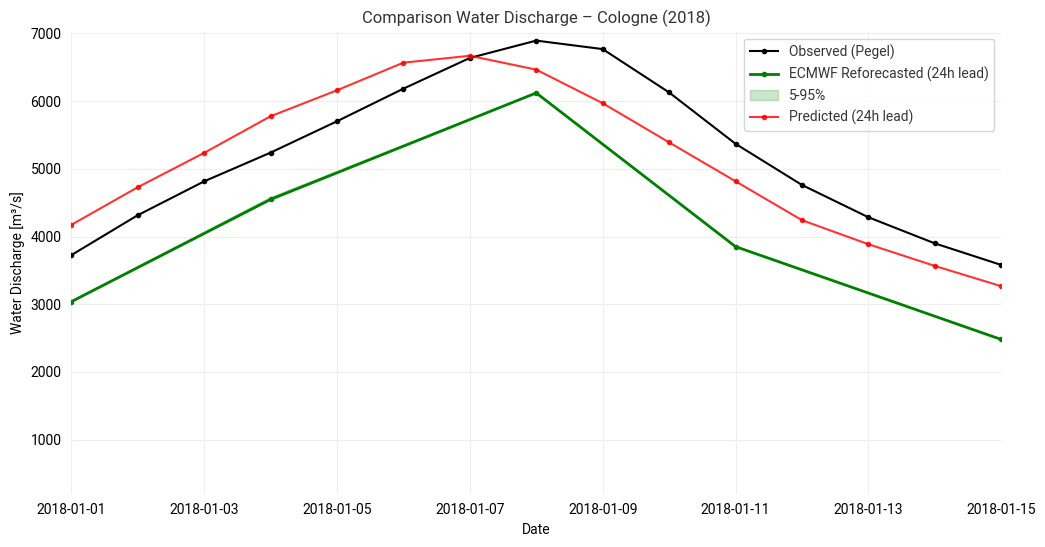

In [13]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(results.index, Q_from_h(results["Actual"]/100), label="Observed (Pegel)", color="black", marker='.')

plt.plot(time, ctrl_y, color="green", lw=2, zorder=2, marker='.', label="ECMWF Reforecasted (24h lead)")
plt.fill_between(
    time,
    q05,
    q95,
    color="green", alpha=0.2, label="5-95%"
)
plt.plot(results.index, Q_from_h(results["Predicted"]/100), label="Predicted (24h lead)", marker='.', color="red", alpha=0.8)

plt.title("Comparison Water Discharge – Cologne (2018)")
plt.xlim(pd.Timestamp("2018-01-01"), pd.Timestamp("2018-01-15"))
plt.ylabel("Water Discharge [m³/s]")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()

## Height

In [14]:
## Translate EFAS discharge to water height
import pandas as pd

ctrl_h_cm = 100 * h_from_Q(ctrl_y)
rfc_ctrl = pd.Series(ctrl_h_cm, index=pd.to_datetime(ctrl.time.values))


ens_x_fixed = pd.to_datetime(ens.time.values).to_pydatetime()
ens_y  = ens.values

ens_h_cm = 100 * h_from_Q(ens_y)   # still (10, 170)

# Transpose to (170, 10) so rows = time, cols = members
rfc_ens = pd.DataFrame(ens_h_cm.T, index=pd.to_datetime(ens_x_fixed))

# Name the columns
rfc_ens.columns = [f"member_{i}" for i in range(rfc_ens.shape[1])]

print(rfc_ens.shape)   # (170, 10)
print(rfc_ens.head())


(342, 11)
            member_0    member_1    member_2    member_3    member_4  \
2018-01-01       NaN  438.559967  438.807251  439.663269  439.449738   
2018-01-04       NaN  615.948792  619.321106  616.316833  617.639893   
2018-01-08       NaN  791.377380  791.373535  791.377380  791.376892   
2018-01-11       NaN  536.169006  536.382141  536.194641  536.203125   
2018-01-15       NaN  370.467133  370.591003  370.421661  370.604797   

              member_5    member_6    member_7    member_8    member_9  \
2018-01-01  439.267395  438.510406  438.701447  438.902771  438.231598   
2018-01-04  620.292908  614.023804  617.563232  616.262329  617.171814   
2018-01-08  791.372437  791.371948  791.376038  791.371887  791.371643   
2018-01-11  536.188843  536.181519  536.171448  536.223145  536.266113   
2018-01-15  370.674347  370.744507  370.681274  370.505035  370.702789   

             member_10  
2018-01-01  440.547333  
2018-01-04  617.616455  
2018-01-08  791.375610  
2018-01-11  

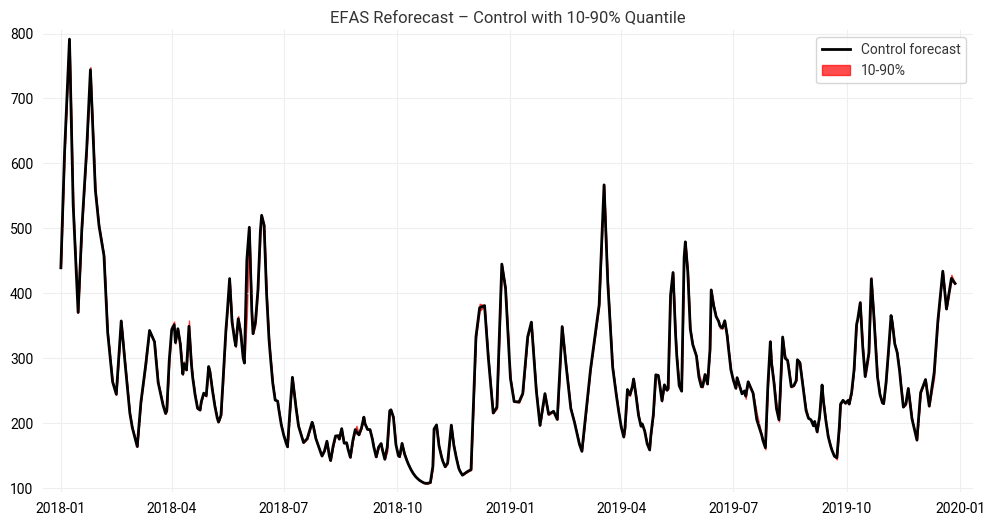

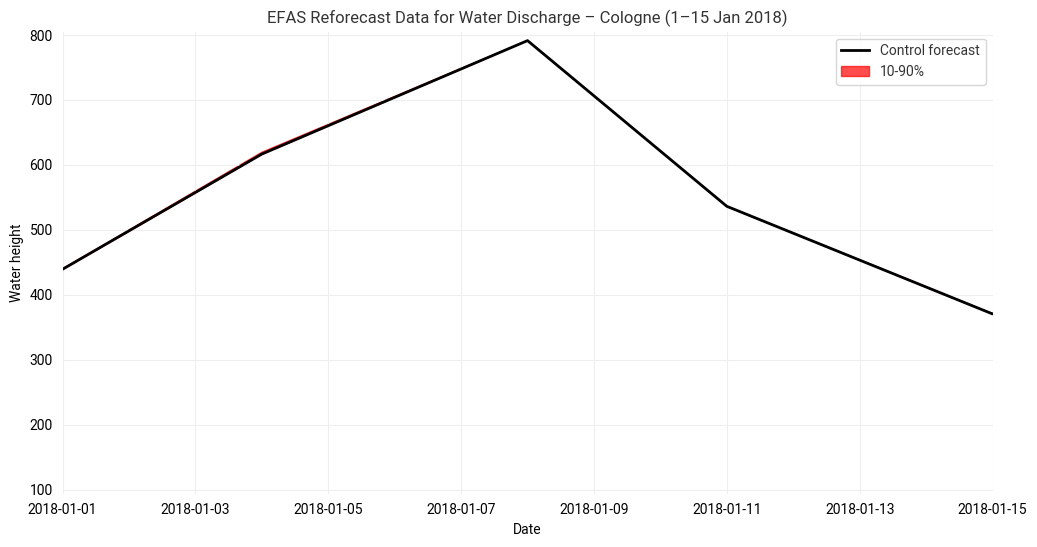

In [15]:
## Plot Obs - Rfc - Pred
# Use ensemble time index (170 steps) consistently
time = rfc_ens.index

# Reindex control to the same time base
ctrl_aligned = rfc_ctrl.reindex(time)

# Compute min–max envelope across members
ens_min = rfc_ens.min(axis=1)
ens_max = rfc_ens.max(axis=1)


q05 = rfc_ens.quantile(0.05, axis=1)
q10 = rfc_ens.quantile(0.1, axis=1)
q20 = rfc_ens.quantile(0.2, axis=1)
q40 = rfc_ens.quantile(0.4, axis=1)
q50 = rfc_ens.quantile(0.5, axis=1)
q60 = rfc_ens.quantile(0.6, axis=1)
q80 = rfc_ens.quantile(0.8, axis=1)
q90 = rfc_ens.quantile(0.9, axis=1)
q95 = rfc_ens.quantile(0.95, axis=1)

# Plot
plt.figure(figsize=(12,6))
plt.plot(time, ctrl_aligned, color="black", lw=2, zorder=2, label="Control forecast")
plt.fill_between(time, ens_min, ens_max, color="red", alpha=0.7, label="10-90%")
plt.title("EFAS Reforecast – Control with 10-90% Quantile")
plt.legend()
plt.grid(True)
plt.show()
# Plot
plt.figure(figsize=(12,6))


# Control forecast
plt.plot(time, ctrl_h_cm, color="black", lw=2, zorder=2, label="Control forecast")
plt.fill_between(
    time,
    q10,
    q90,
    color="red", alpha=0.7, label="10-90%"
)

#print('ctrl {m}:',ctrl_y)
plt.title("EFAS Reforecast Data for Water Discharge – Cologne (1–15 Jan 2018)")
plt.xlim(pd.Timestamp("2018-01-01"), pd.Timestamp("2018-01-15"))
plt.ylabel("Water height")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()

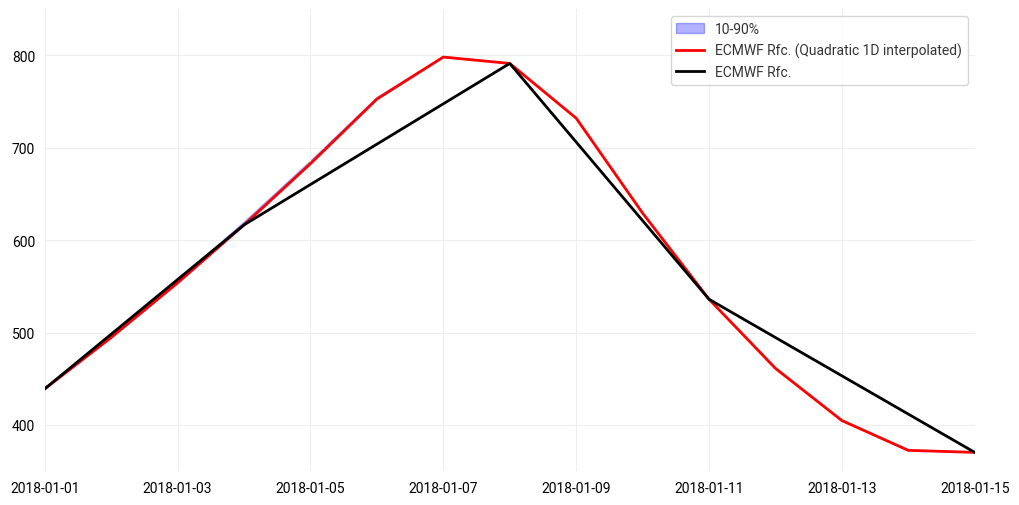

In [16]:
# Ctrl
df_ctrl = pd.DataFrame({"ctrl_y": ctrl_h_cm}, index=time)

# Daily resample + interpolate
df_ctrl_daily = df_ctrl.resample("D").interpolate(method="quadratic")

x_daily = df_ctrl_daily.index
ctrl_y_daily = df_ctrl_daily["ctrl_y"].values

# Ens
# ens_h_cm should be shape (n_members, n_times)
# Transpose to (n_times, n_members) for DataFrame
df_ens = pd.DataFrame(ens_h_cm.T, index=time)

# Resample to daily and interpolate each member
df_ens_daily = df_ens.resample("D").interpolate(method="quadratic")

# Compute min–max across ensemble members at each daily step
ens_min = df_ens_daily.min(axis=1)
ens_max = df_ens_daily.max(axis=1)




q05 = df_ens_daily.quantile(0.05, axis=1)
q10 = df_ens_daily.quantile(0.1, axis=1)
q20 = df_ens_daily.quantile(0.2, axis=1)
q40 = df_ens_daily.quantile(0.4, axis=1)
q50 = df_ens_daily.quantile(0.5, axis=1)
q60 = df_ens_daily.quantile(0.6, axis=1)
q80 = df_ens_daily.quantile(0.8, axis=1)
q90 = df_ens_daily.quantile(0.9, axis=1)
q95 = df_ens_daily.quantile(0.95, axis=1)

# --- Plot ---
plt.figure(figsize=(12,6))

# Ensemble min–max band
plt.fill_between(x_daily, q10, q90, color="blue", alpha=0.3, label="10-90%")

# Control (interpolated daily)
plt.plot(x_daily, ctrl_y_daily, color="red", lw=2, zorder=2,
         label="ECMWF Rfc. (Quadratic 1D interpolated)")

# Control (original, not interpolated)
plt.plot(time, ctrl_h_cm, color="black", lw=2, zorder=2, label="ECMWF Rfc.")

plt.xlim(pd.Timestamp("2018-01-01"), pd.Timestamp("2018-01-15"))
plt.ylim(350, 850)
plt.legend()
plt.grid(True)
plt.show()


## Final comparison

In [17]:
results_ecmwfcompatible = results.iloc[:-3]
len(results_ecmwfcompatible)

362

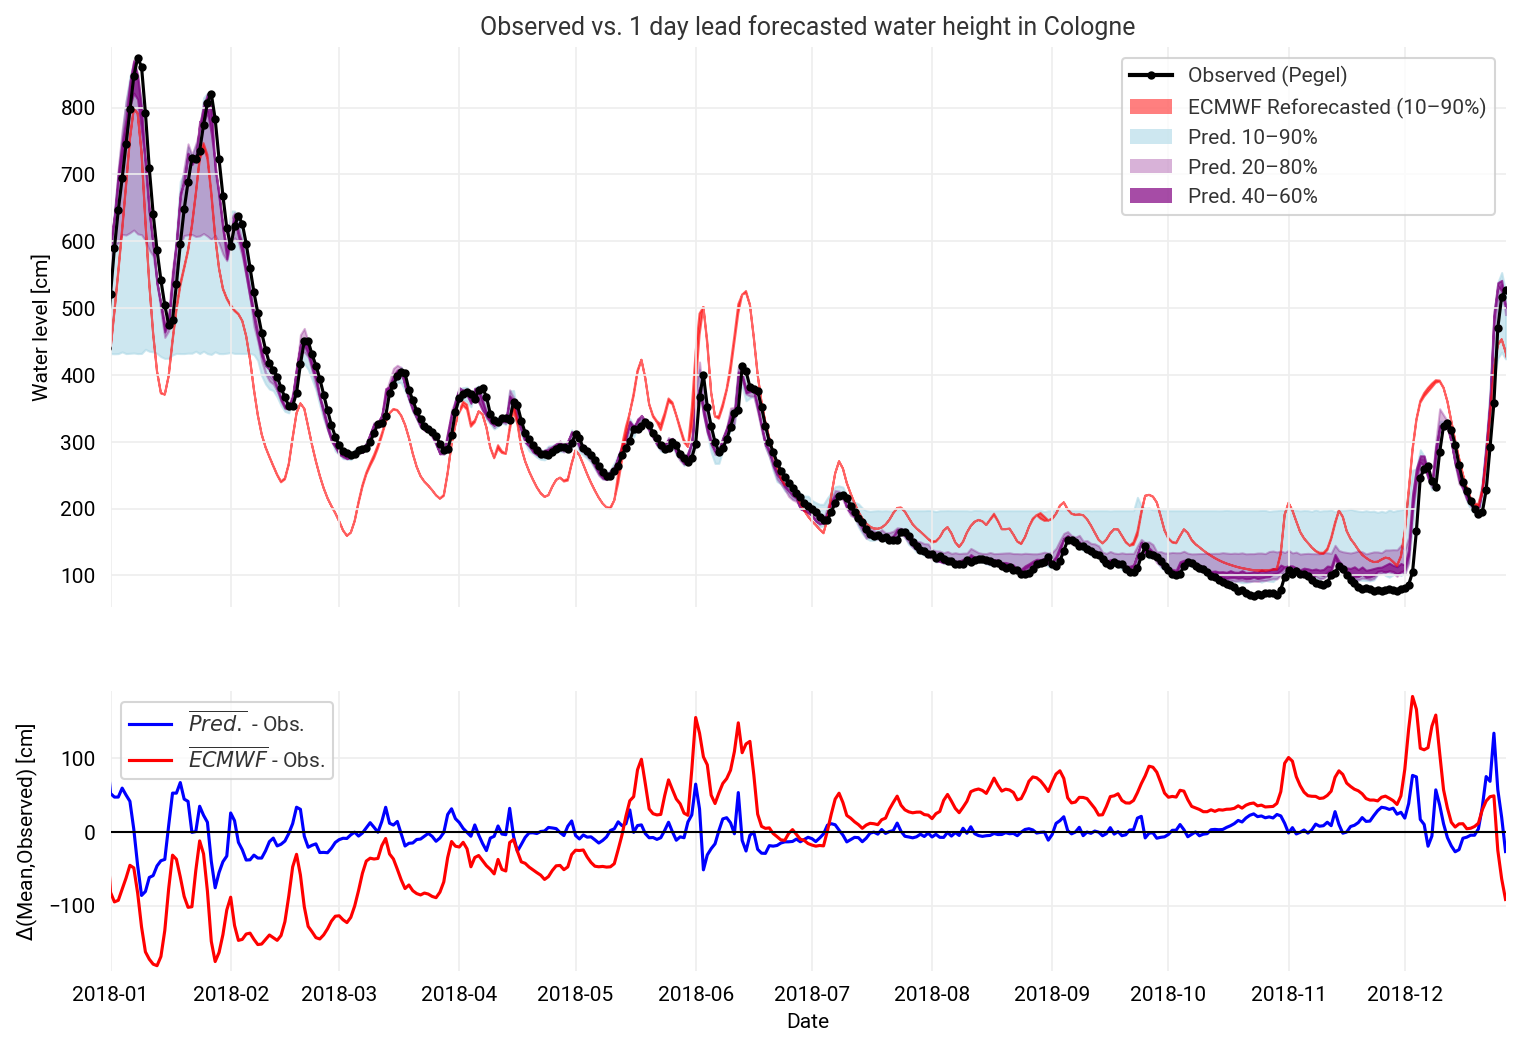

In [18]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# --- Compute differences for second subplot ---
obs = results_ecmwfcompatible["Actual"]
pred = results_ecmwfcompatible["Predicted"]
ecmwf_ctrl = pd.Series(ctrl_y_daily, index=x_daily).reindex(obs.index, method="nearest")

diff_pred = -obs + pred
diff_ctrl = -obs + ecmwf_ctrl

# --- Create two subplots with shared x-axis ---
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(12,8), dpi=150, sharex=True,
    gridspec_kw={"height_ratios": [2, 1]}  # top taller than bottom
)

# Obs.
ax1.plot(obs.index, obs, color="black", marker=".", label="Observed (Pegel)")


# Pred.
ax1.fill_between(results_ecmwfcompatible.index, results_ecmwfcompatible["10"], results_ecmwfcompatible["90"], 
                 color="lightblue", alpha=0.6, label="Pred. quantile (10-90%)")
ax1.fill_between(results_ecmwfcompatible.index, results_ecmwfcompatible["20"], results_ecmwfcompatible["80"],
                 color="purple", alpha=0.3, label="Pred. quantile (20-80%)")
ax1.fill_between(results_ecmwfcompatible.index, results_ecmwfcompatible["40"], results_ecmwfcompatible["60"],
                 color="purple", alpha=0.7, label="Pred. quantile (40-60%)")

# Ensemble band + control line
ax1.fill_between(x_daily, q10, q90, color="red", alpha=0.6, label="Pred. quantile (10-90%)")
#ax1.fill_between(x_daily, q20, q80, color="red", alpha=0.6, label="Pred. quantile (20-80%)")
#ax1.fill_between(x_daily, q40, q60, color="red", alpha=0.7, label="Pred. quantile (40-60%)")
#ax1.plot(x_daily, ctrl_y_daily, color="red", lw=2, zorder=2,alpha=0.8)



# Custom legend
custom_handles = [
    Line2D([], [], color="black", marker=".", lw=2, label="Observed (Pegel)"),
    (Patch(facecolor="red", alpha=0.5),)
]
custom_labels = [
    "Observed (Pegel)",
    "ECMWF Reforecasted (10–90%)"
]

# Quantile legend
quantile_handles = [
    Patch(facecolor="lightblue", alpha=0.6, label="10–90%"),
    Patch(facecolor="purple", alpha=0.3, label="20–80%"),
    Patch(facecolor="purple", alpha=0.7, label="40–60%")
]

# Final legend
all_handles = custom_handles + quantile_handles
all_labels = custom_labels + ["Pred. 10–90%", "Pred. 20–80%", "Pred. 40–60%"]

ax1.legend(all_handles, all_labels)

ax1.set_ylabel("Water level [cm]")
ax1.set_title("Observed vs. "+str(lead_day)+" day lead forecasted water height in Cologne")
ax1.grid(True)

# Bottom plot
#ax2.plot(diff_pred.index, diff_pred, color="red", label="Pred - Obs")
ax2.plot(diff_pred.index, diff_pred, color="blue", label="$\overline{Pred.}$ - Obs.")

ax2.plot(diff_ctrl.index, diff_ctrl, color="red", label="$\overline{ECMWF}$ - Obs.")
ax2.axhline(0, color="black", lw=1, linestyle="-")

ax2.set_ylabel("$\Delta$(Mean,Observed) [cm]")
ax2.set_xlabel("Date")
ax2.legend()
ax2.grid(True)

ax1.set_xlim(pd.Timestamp("2018-01-01"), pd.Timestamp("2018-1-15"))
save_path = os.path.join(save_dir, "obs_pred_rfc_jan18.png")
# Save plot
plt.savefig(save_path, dpi=300, bbox_inches="tight")

ax1.set_xlim(pd.Timestamp("2018-01-01"), pd.Timestamp("2018-12-27"))
save_path = os.path.join(save_dir, "obs_pred_rfc_full.png")
# Save plot
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()


In [19]:
from datetime import datetime

now = datetime.now()
print(lead_day)
print(now.strftime("%H:%M"))

1
22:00
